In [12]:
from __future__ import print_function

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [455]:

print("N4 bias correction runs.")
inputImage = sitk.ReadImage("/home/bhakti/Desktop/selected images/HGG/Brats18_TCIA08_469_1/Brats18_TCIA08_469_1_seg.nii.gz")
# maskImage = sitk.ReadImage("06-t1c_mask.nii.gz")
maskImage = sitk.OtsuThreshold(inputImage,0,1,200) #Search threshold on google
sitk.WriteImage(maskImage, "/home/bhakti/Desktop/selected images/HGG/Brats18_TCIA08_469_1/Brats18_TCIA08_469_1_segMask.nii.gz" )

inputImage = sitk.Cast(inputImage,sitk.sitkFloat32)

corrector = sitk.N4BiasFieldCorrectionImageFilter();

output = corrector.Execute(inputImage,maskImage)
sitk.WriteImage(output, "/home/bhakti/Desktop/selected images/HGG/Brats18_TCIA08_469_1/Brats18_TCIA08_469_1_seg.nii.gz")
print("Finished N4 Bias Field Correction.....")

N4 bias correction runs.
Finished N4 Bias Field Correction.....


In [456]:
nda3 = sitk.GetArrayFromImage(maskImage)


In [457]:
nda = sitk.GetArrayFromImage(output)


In [458]:
nda2 = sitk.GetArrayFromImage(inputImage)



In [194]:
nda

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

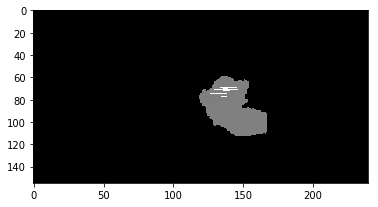

In [459]:
plt.imshow(nda[:, 120 , : ], 'gray', aspect = 0.8)

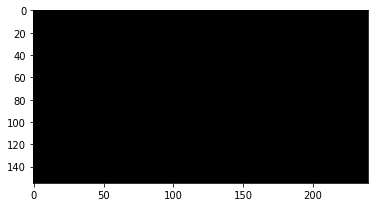

In [460]:
plt.imshow(nda2[:, :, 66], 'gray', aspect = 0.8)

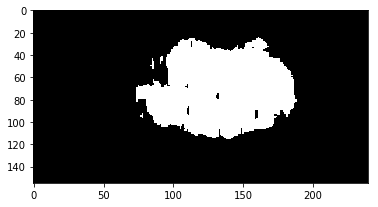

In [454]:
plt.imshow(nda3[:, :, 66 ], 'gray', aspect = 0.8)

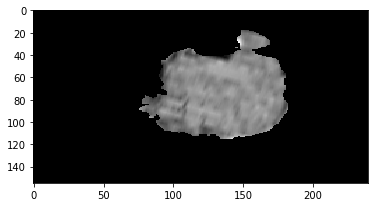

In [403]:
plt.imshow(nda[:, :, 66 ], 'gray', aspect = 0.8)

In [51]:
from intensity_normalization.normalize import fcm

In [26]:

wm_mask = fcm.find_wm_mask(nda, nda3)
normalized = fcm.fcm_normalize(nda, wm_mask)

AttributeError: 'numpy.ndarray' object has no attribute 'get_data'

In [ ]:
intensity_normalization.utilities.preprocess.preprocess(img_dir, mask_dir, out_dir, res=(1, 1, 1), orientation='RAI', n4_opts=None, n4_once=False)